In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
flight = sns.load_dataset('flights')

In [4]:
flight

year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
season

In [5]:
flight['Date'] = flight['year'].astype(str)+'-'+flight['month'].astype(str)
flight['Date'] = pd.to_datetime(flight['Date'])

In [6]:
flight.set_index('Date', inplace=True)

In [7]:
flight.head()

year month  passengers
Date                              
1949-01-01  1949   Jan         112
1949-02-01  1949   Feb         118
1949-03-01  1949   Mar         132
1949-04-01  1949   Apr         129
1949-05-01  1949   May         121

In [8]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 3.9 KB


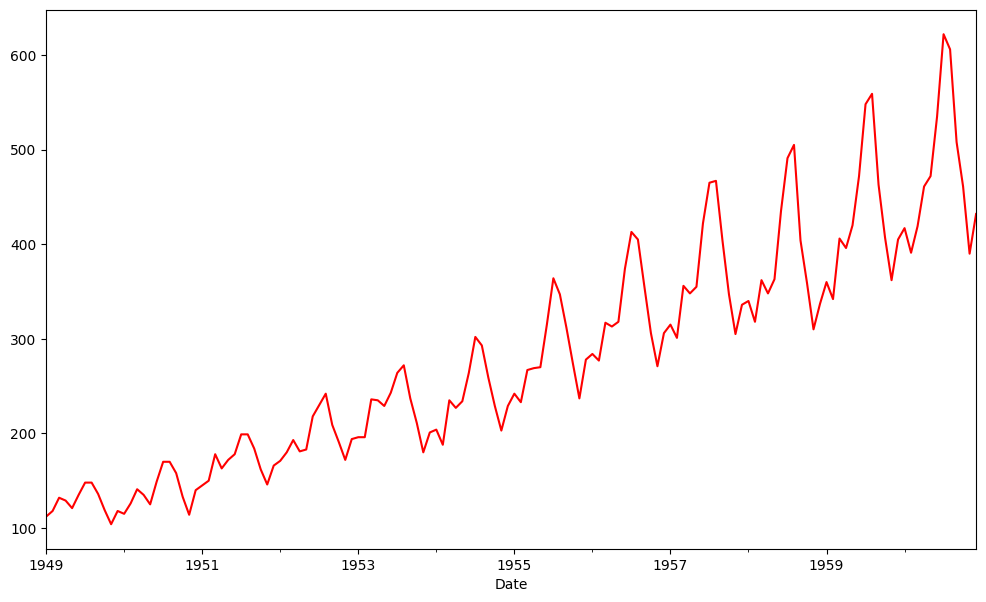

In [9]:
ax = flight['passengers'].plot(figsize=(12, 7), style='red')

In [10]:
flight['rollmean'] = flight['passengers'].rolling(window=12).mean()
flight['rollstd'] = flight['passengers'].rolling(window=12).std()

In [11]:
flight.head(13)

year month  passengers    rollmean    rollstd
Date                                                     
1949-01-01  1949   Jan         112         NaN        NaN
1949-02-01  1949   Feb         118         NaN        NaN
1949-03-01  1949   Mar         132         NaN        NaN
1949-04-01  1949   Apr         129         NaN        NaN
1949-05-01  1949   May         121         NaN        NaN
1949-06-01  1949   Jun         135         NaN        NaN
1949-07-01  1949   Jul         148         NaN        NaN
1949-08-01  1949   Aug         148         NaN        NaN
1949-09-01  1949   Sep         136         NaN        NaN
1949-10-01  1949   Oct         119         NaN        NaN
1949-11-01  1949   Nov         104         NaN        NaN
1949-12-01  1949   Dec         118  126.666667  13.720147
1950-01-01  1950   Jan         115  126.916667  13.453342

<AxesSubplot:xlabel='Date'>

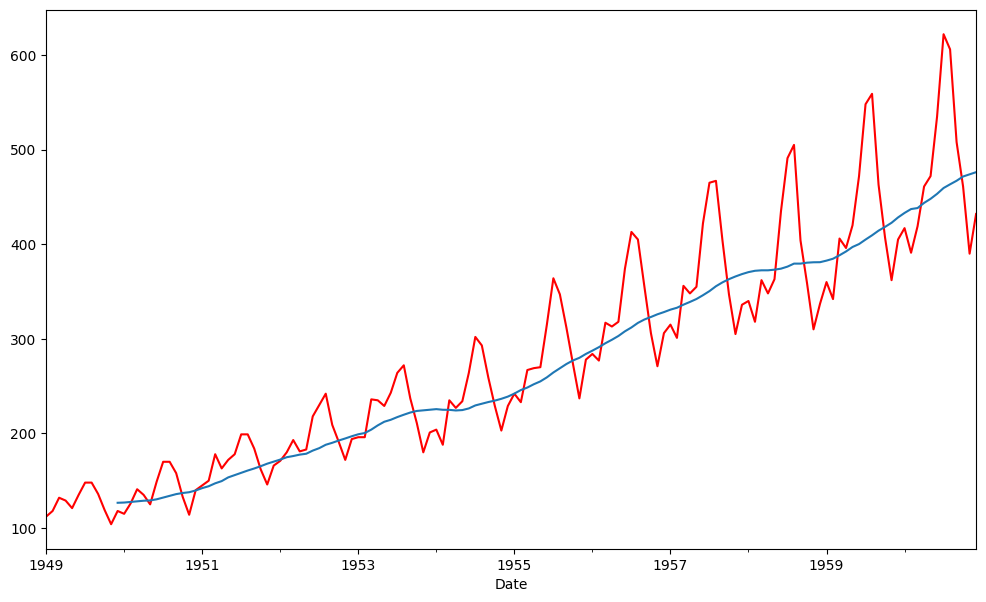

In [12]:
flight['passengers'].plot(figsize=(12, 7), style='red')
flight['rollmean'].plot(figsize=(12, 7))

<AxesSubplot:xlabel='Date'>

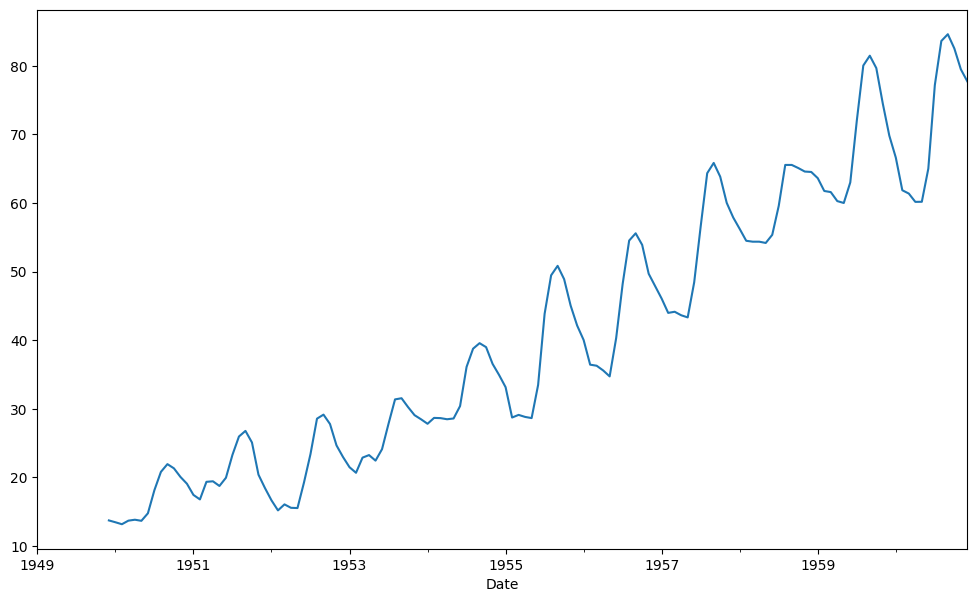

In [13]:
flight['rollstd'].plot(figsize=(12, 7))

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adftest = adfuller(flight['passengers'], autolag='AIC')

In [16]:
adftest

(0.8153688792060441,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [17]:
def test_stats(df, var):
    df['rollmean'] = df[var].rolling(window=12).mean()
    df['rollstd'] = df[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adftest = adfuller(df[var], autolag='AIC')
    stats = pd.Series(adftest[0:4], index=['Test Stats', 'p-value', '#lags used', 'no_of_observations'])
    return stats

In [18]:
flight = sns.load_dataset('flights')
flight['Date'] = flight['year'].astype(str)+'-'+flight['month'].astype(str)
flight['Date'] = pd.to_datetime(flight['Date'])
flight.set_index('Date', inplace=True)
flight.pop('year')
flight.pop('month')

Date
1949-01-01    Jan
1949-02-01    Feb
1949-03-01    Mar
1949-04-01    Apr
1949-05-01    May
             ... 
1960-08-01    Aug
1960-09-01    Sep
1960-10-01    Oct
1960-11-01    Nov
1960-12-01    Dec
Name: month, Length: 144, dtype: category
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [19]:
flight.head()

passengers
Date                  
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

In [20]:
flight['shifted_1mo'] = flight['passengers'].shift()
flight.head()

passengers  shifted_1mo
Date                               
1949-01-01         112          NaN
1949-02-01         118        112.0
1949-03-01         132        118.0
1949-04-01         129        132.0
1949-05-01         121        129.0

In [21]:
flight['shiftDiff'] = flight['passengers']-flight['shifted_1mo']

In [22]:
flight

passengers  shifted_1mo  shiftDiff
Date                                          
1949-01-01         112          NaN        NaN
1949-02-01         118        112.0        6.0
1949-03-01         132        118.0       14.0
1949-04-01         129        132.0       -3.0
1949-05-01         121        129.0       -8.0
...                ...          ...        ...
1960-08-01         606        622.0      -16.0
1960-09-01         508        606.0      -98.0
1960-10-01         461        508.0      -47.0
1960-11-01         390        461.0      -71.0
1960-12-01         432        390.0       42.0

[144 rows x 3 columns]

In [23]:
test_stats(flight.dropna(), 'shiftDiff')

C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_19032\3463493031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollmean'] = df[var].rolling(window=12).mean()
C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_19032\3463493031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollstd'] = df[var].rolling(window=12).std()


Test Stats             -2.829267
p-value                 0.054213
#lags used             12.000000
no_of_observations    130.000000
dtype: float64

In [24]:
flight = sns.load_dataset('flights')
flight['Date'] = flight['year'].astype(str)+'-'+flight['month'].astype(str)
flight['Date'] = pd.to_datetime(flight['Date'])
flight.set_index('Date', inplace=True)
flight.pop('year')
flight.pop('month')

Date
1949-01-01    Jan
1949-02-01    Feb
1949-03-01    Mar
1949-04-01    Apr
1949-05-01    May
             ... 
1960-08-01    Aug
1960-09-01    Sep
1960-10-01    Oct
1960-11-01    Nov
1960-12-01    Dec
Name: month, Length: 144, dtype: category
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [25]:
flight['log'] = np.log(flight['passengers'])

In [26]:
flight['shiftedLog'] = flight['log'].shift()

In [27]:
flight['shiftedLogDiff'] = flight['log']-flight['shiftedLog']

In [28]:
test_stats(flight.dropna(), 'shiftedLog')

C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_19032\3463493031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollmean'] = df[var].rolling(window=12).mean()
C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_19032\3463493031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollstd'] = df[var].rolling(window=12).std()


Test Stats             -1.689021
p-value                 0.436778
#lags used             13.000000
no_of_observations    129.000000
dtype: float64

In [29]:
flight = sns.load_dataset('flights')
flight['Date'] = flight['year'].astype(str)+'-'+flight['month'].astype(str)
flight['Date'] = pd.to_datetime(flight['Date'])
flight.set_index('Date', inplace=True)
flight.pop('year')
flight.pop('month')
flight['log'] = np.log(flight['passengers'])
flight['sqrt_log'] = np.log(flight['log'])


In [30]:
test_stats(flight, 'sqrt_log')

Test Stats             -2.156028
p-value                 0.222590
#lags used             13.000000
no_of_observations    130.000000
dtype: float64

In [31]:
flight = sns.load_dataset('flights')
flight['Date'] = flight['year'].astype(str)+'-'+flight['month'].astype(str)
flight['Date'] = pd.to_datetime(flight['Date'])
flight.set_index('Date', inplace=True)
flight.pop('year')
flight.pop('month')
flight['log'] = np.log(flight['passengers'])
flight['sqrt_log'] = np.log(flight['log'])
flight['sqrt_log_diff'] = flight['sqrt_log']-flight['sqrt_log'].shift()

In [32]:
test_stats(flight.dropna(), 'sqrt_log_diff')

C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_19032\3463493031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollmean'] = df[var].rolling(window=12).mean()
C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_19032\3463493031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollstd'] = df[var].rolling(window=12).std()


Test Stats             -2.501708
p-value                 0.115059
#lags used             14.000000
no_of_observations    128.000000
dtype: float64

In [33]:
flight = sns.load_dataset('flights')
flight['Date'] = flight['year'].astype(str)+'-'+flight['month'].astype(str)
flight['Date'] = pd.to_datetime(flight['Date'])
flight.set_index('Date', inplace=True)
flight.pop('year')
flight.pop('month')

Date
1949-01-01    Jan
1949-02-01    Feb
1949-03-01    Mar
1949-04-01    Apr
1949-05-01    May
             ... 
1960-08-01    Aug
1960-09-01    Sep
1960-10-01    Oct
1960-11-01    Nov
1960-12-01    Dec
Name: month, Length: 144, dtype: category
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [34]:
flight.head()

passengers
Date                  
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

In [35]:
flight['2nd_shift'] = flight['passengers'].shift(2)
flight['2ndshifted'] = flight['passengers']-flight['2nd_shift']

In [36]:
flight.head()

passengers  2nd_shift  2ndshifted
Date                                         
1949-01-01         112        NaN         NaN
1949-02-01         118        NaN         NaN
1949-03-01         132      112.0        20.0
1949-04-01         129      118.0        11.0
1949-05-01         121      132.0       -11.0

In [37]:
test_stats(flight.dropna(), '2ndshifted')

C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_19032\3463493031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollmean'] = df[var].rolling(window=12).mean()
C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_19032\3463493031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollstd'] = df[var].rolling(window=12).std()


Test Stats             -2.961695
p-value                 0.038630
#lags used             11.000000
no_of_observations    130.000000
dtype: float64

<AxesSubplot:xlabel='Date'>

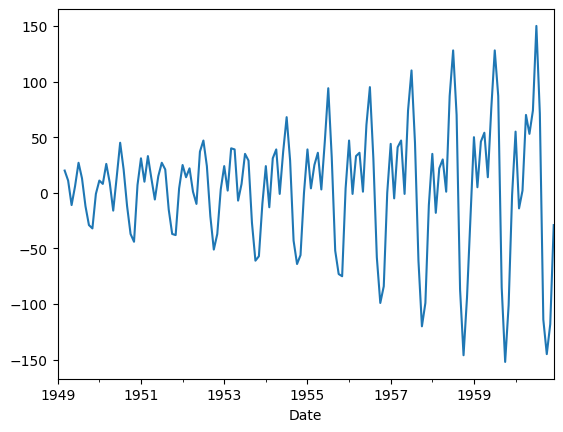

In [38]:
flight['2ndshifted'].plot()

In [39]:
flight = sns.load_dataset('flights')
flight['Date'] = flight['year'].astype(str)+'-'+flight['month'].astype(str)
flight['Date'] = pd.to_datetime(flight['Date'])
flight.set_index('Date', inplace=True)
flight.pop('year')
flight.pop('month')

Date
1949-01-01    Jan
1949-02-01    Feb
1949-03-01    Mar
1949-04-01    Apr
1949-05-01    May
             ... 
1960-08-01    Aug
1960-09-01    Sep
1960-10-01    Oct
1960-11-01    Nov
1960-12-01    Dec
Name: month, Length: 144, dtype: category
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [40]:
flight['1stShift'] = flight['passengers'].shift(1)
flight['2ndShift'] = flight['passengers'].shift(2)

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


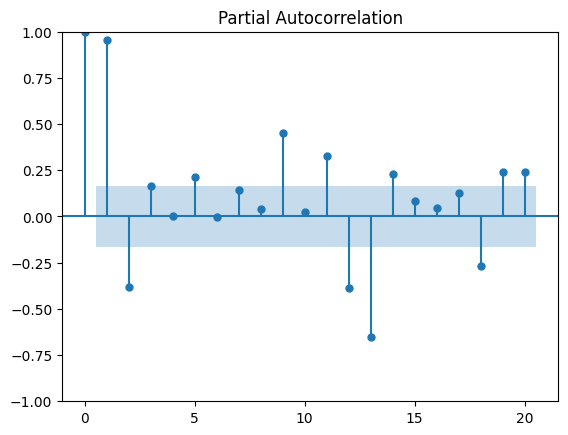

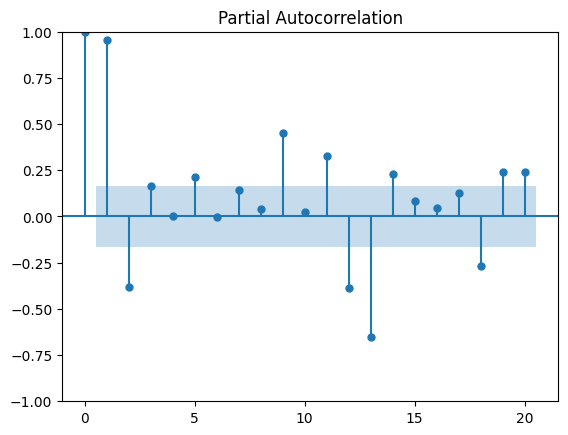

In [42]:
plot_pacf(flight['1stShift'].dropna(), lags=20)

In [43]:
train = flight[:round(len(flight)*70/100)]

In [44]:
train.head()

passengers  1stShift  2ndShift
Date                                      
1949-01-01         112       NaN       NaN
1949-02-01         118     112.0       NaN
1949-03-01         132     118.0     112.0
1949-04-01         129     132.0     118.0
1949-05-01         121     129.0     132.0